In [1]:
from Word2Vec import Word2Vec_Evaluation
import sys
from scipy.stats import spearmanr
import requests
import numpy as np
from os import listdir
from datetime import datetime
from os.path import isdir, isfile, join
import matplotlib.pylab as plt

In [2]:
host = "http://127.0.0.1:5000"

In [3]:
def npmi_model_routine(topic_list):
    npmi_results = []
    
    for topic in topic_list:
        r = requests.post(host+"/checktopic/", data={'topic':" ".join(topic.split()), 'window_size':10}) 
        if (r.status_code == 200 and eval(r.text)["code"] == 200 ):
            npmi_results.append(eval(r.text)["npmi"]) 

    return np.mean(np.array(npmi_results))

In [4]:
folderpath = 'model_topics'
files = [f for f in listdir(folderpath) if isfile(join(folderpath, f)) and f[0]!= '.' ]
results = {}
for file in files:
    print("analysing file {}".format(file))
    arq = open(folderpath+"/"+file, "r").read()
    topic_list = arq.splitlines()
    result = npmi_model_routine(topic_list)
    print("npmi=", result)
    results[file] = result

analysing file FolhaCompleto200t_1000i.txt
npmi= 0.07994661725279362
analysing file FolhaCompletoNMF_100t.txt
npmi= 0.07527348480321981
analysing file FolhaCompletoNMF_150t.txt
npmi= 0.07269719706262653
analysing file FolhaCompletoNMF_200t.txt
npmi= 0.06781422337876285
analysing file FolhaCompletoNMF_50t.txt
npmi= 0.074312489788709
analysing file FolhaCompleto50t_1000i.txt
npmi= 0.06909049077033474
analysing file FolhaCompleto150t_1000i.txt
npmi= 0.08026968281629782
analysing file FolhaCompleto100t_1000i.txt
npmi= 0.08154712624203357


In [5]:
res = []
for key in results.keys():
    res.append([key,results[key]])

In [12]:
res.sort(key = lambda x: x[1], reverse=True)
print(res)
res[0][0] = 'LDA100'
res[1][0] = 'LDA150'
res[2][0] = 'LDA200'
res[3][0] = 'NMF100'
res[4][0] = 'NMF50'
res[5][0] = 'NMF150'
res[6][0] = 'LDA50'
res[7][0] = 'NMF200'
res.sort(key = lambda x: x[1])

[['FolhaCompleto100t_1000i.txt', 0.08154712624203357], ['FolhaCompleto150t_1000i.txt', 0.08026968281629782], ['FolhaCompleto200t_1000i.txt', 0.07994661725279362], ['FolhaCompletoNMF_100t.txt', 0.07527348480321981], ['FolhaCompletoNMF_50t.txt', 0.074312489788709], ['FolhaCompletoNMF_150t.txt', 0.07269719706262653], ['FolhaCompleto50t_1000i.txt', 0.06909049077033474], ['FolhaCompletoNMF_200t.txt', 0.06781422337876285]]


In [13]:
res

[['NMF200', 0.06781422337876285],
 ['LDA50', 0.06909049077033474],
 ['NMF150', 0.07269719706262653],
 ['NMF50', 0.074312489788709],
 ['NMF100', 0.07527348480321981],
 ['LDA200', 0.07994661725279362],
 ['LDA150', 0.08026968281629782],
 ['LDA100', 0.08154712624203357]]

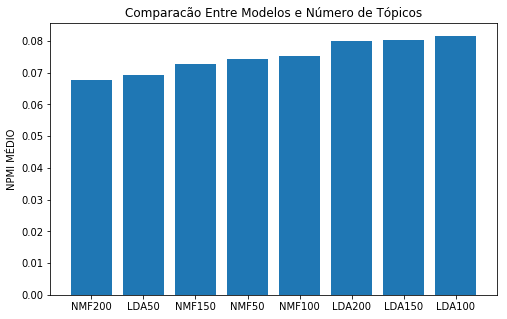

In [15]:
x1, y1 = zip(*res)
plt.figure(figsize=(8,5))
plt.bar(x1, y1)
plt.ylabel('NPMI MÉDIO')
plt.title("Comparacão Entre Modelos e Número de Tópicos")
plt.show()